In [167]:
import numpy as np
import sympy as sy
from scipy import optimize as opt
from matplotlib import pyplot as plt
from scipy import linalg as la

# Problem 1

In [168]:
def newtons(f, x_0, f_prime, tol=1e-5, maxiters=15):
    '''
    Computes a zero of f using Newtons method.
    
    Returns: approximation to x s.t. f(x) = 0, a boolean
    indicating whether or not the algorithm converged, and 
    the number of iterations completed
    '''
    i = 0
    dist = 1e3
    converged = False
    while dist >= tol and i < maxiters:
        x_1 = x_0 - (f(x_0) / f_prime(x_0))
        dist = np.abs(x_1 - x_0)
        x_0 = x_1
        i += 1
    if i < maxiters:
        converged = True
        
    return x_1, converged, i

In [169]:
f = sy.lambdify(sy.symbols('x'), (lambda x: sy.exp(sy.symbols('x')) - 2)(sy.symbols('x')))
f_prime = sy.lambdify(sy.symbols('x'), (lambda x: sy.diff(sy.exp(sy.symbols('x')) - 2))(sy.symbols('x')))

x = newtons(f, 0, f_prime)
print(f'x = {x[0]}\nconverged: {x[1]}\nnumber of iterations: {x[2]}')
print(f'f(x) = {f(x[0])}')

x_sci = opt.newton(lambda x: np.exp(x) - 2, 0)
print(f'\nscipy x = {x_sci}')

x = 0.6931471805600254
converged: True
number of iterations: 5
f(x) = 1.603162047558726e-13

scipy x = 0.6931471805599592


In [170]:
f = sy.lambdify(sy.symbols('x'), (lambda x: sy.symbols('x')**4 - 3)(sy.symbols('x')))
f_prime = sy.lambdify(sy.symbols('x'), (lambda x: sy.diff(sy.symbols('x')**4 - 3))(sy.symbols('x')))

x = newtons(f, 1, f_prime)
print(f'x = {x[0]}\nconverged: {x[1]}\nnumber of iterations: {x[2]}')
print(f'f(x) = {f(x[0])}')

x_sci = opt.newton(lambda x: x ** 4 - 3, 1)
print(f'\nscipy x = {x_sci}')

x = 1.3160740129543826
converged: True
number of iterations: 5
f(x) = 1.723465814507108e-11

scipy x = 1.3160740129524924


# Problem 2

In [171]:
def interest(N1, N2, P1, P2):
    f = lambda r: P1 * ((1 + r) ** N1 - 1) - P2 * (1 - (1 + r) ** (-N2))
    f_prime = lambda r: N1 * P1 * (1 + r) ** (N1 - 1) - N2 * P2 * (1 + r) ** (-N2 - 1)

    r_0 = 0.1
    return newtons(f, r_0, f_prime)

In [172]:
N1 = 30
N2 = 20
P1 = 2000
P2 = 8000
r = interest(N1, N2, P1, P2)
print(f'r = {r[0]}')

r = 0.03877843223027751


# Problem 3

In [173]:
def newtons_with_backtracking(f, x_0, f_prime, α=1, tol=1e-5, maxiters=15):
    '''
    Computes a zero of f using Newtons method with backtracking.
    
    Returns: approximation to x s.t. f(x) = 0, a boolean
    indicating whether or not the algorithm converged, and 
    the number of iterations completed
    '''
    i = 0
    dist = 1e3
    converged = False
    while dist >= tol and i < maxiters:
        x_1 = x_0 - α * (f(x_0) / f_prime(x_0))
        dist = np.abs(x_1 - x_0)
        x_0 = x_1
        i += 1
    if i < maxiters:
        converged = True
        
    return x_1, converged, i

In [174]:
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f_prime = lambda x: 1./3 * np.power(np.abs(x), -2/3)

In [175]:
x = newtons_with_backtracking(f, 0.01, f_prime)
print(f'x = {x[0]}\nconverged: {x[1]}\nnumber of iterations: {x[2]}')

x = -327.6800000000003
converged: False
number of iterations: 15


In [176]:
x = newtons_with_backtracking(f, 0.01, f_prime, α=0.4)
print(f'x = {x[0]}\nconverged: {x[1]}\nnumber of iterations: {x[2]}')
print(f'f(x) = {f(x[0])}')

x = 6.400000000000134e-07
converged: True
number of iterations: 6
f(x) = 0.008617738760127598


# Problem 4

In [177]:
def newtons_α(f, x_0, f_prime, tol=1e-5, maxiters=100):
    '''
    Plot values of α against the number of iterations performed
    by Newton's method.
    
    Returns: α that results in the lowest number of iterations

    '''
    n = 1000
    α_list = np.linspace(0.01, 1.0001, n)  # test values of α
    iterations = np.empty_like(α_list)
    for j, α in enumerate(α_list):
        # get number of iterations from problem (3) function
        i = newtons_with_backtracking(f, x_0, f_prime, α, tol=tol, maxiters=maxiters)[2]
        iterations[j] = i
    
    plt.plot(α_list, iterations, marker='.', markersize=1)
    plt.xlabel("α")
    plt.ylabel("iterations")
    
    return α_list[np.argwhere(iterations == np.min(iterations))][0][0]

α that results in the lowest number of iterations: 0.33


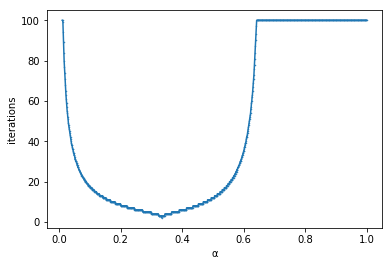

In [178]:
opt_α = newtons_α(f, 0.01, f_prime)
print(f'α that results in the lowest number of iterations: {round(opt_α, 2)}')

# Problem 5

In [179]:
def newtons_ndim(f, x_0, Df, tol=1e-5, maxiters=15):
    '''
    Computes a zero of f for any n using Newtons method.
    
    Returns: approximation to x s.t. f(x) = 0, a boolean
    indicating whether or not the algorithm converged, and 
    the number of iterations completed
    '''
    i = 0
    dist = 1e3
    converged = False
    
    if np.isscalar(x_0):
        while dist >= tol and i < maxiters:
            x_1 = x_0 - (f(x_0) / Df(x_0))
            dist = np.abs(x_1 - x_0)
            x_0 = x_1
            i += 1
    else:
        while dist >= tol and i < maxiters:
            y = la.solve(Df(x_0), f(x_0))
            x_1 = x_0 - y
            dist = la.norm(x_1 - x_0, np.inf)
            x_0 = x_1
            i += 1
    if i < maxiters:
        converged = True
        
    return x_1, converged, i

In [180]:
f = lambda x: np.array([x[0]**2, x[0]**3 - x[1]])
f_prime = lambda x: np.array([[2 * x[0] , 0], [3 * x[0]**2, -1]])

x = newtons_ndim(f, np.full(2, 1.5), f_prime, maxiters=100)
print(f'x = {x[0]}\nconverged: {x[1]}\nnumber of iterations: {x[2]}')
print(f'f(x) = {f(x[0])}')

x = [ 5.72204590e-06 -7.49400542e-16]
converged: True
number of iterations: 18
f(x) = [3.27418093e-11 9.36750677e-16]


In [181]:
def interest_2(N1, N2, P1, P2):
    f = lambda r: P1 * ((1 + r) ** N1 - 1) - P2 * (1 - (1 + r) ** (-N2))
    f_prime = lambda r: N1 * P1 * (1 + r) ** (N1 - 1) - N2 * P2 * (1 + r) ** (-N2 - 1)

    r_0 = 0.1
    return newtons_ndim(f, r_0, f_prime)

N1 = 30
N2 = 20
P1 = 2000
P2 = 8000
r = interest_2(N1, N2, P1, P2)
print(f'r = {r[0]}')

r = 0.03877843223027751


In [182]:
def newtons_ndim_with_backtracking(f, x_0, Df, α=1, tol=1e-5, maxiters=15):
    '''
    Computes a zero of f for any n using Newtons method with backtracking.
    
    Returns: approximation to x s.t. f(x) = 0, a boolean
    indicating whether or not the algorithm converged, and 
    the number of iterations completed
    '''
    i = 0
    dist = 1e3
    converged = False
    
    if np.isscalar(x_0):
        while dist >= tol and i < maxiters:
            x_1 = x_0 - (f(x_0) / Df(x_0))
            dist = np.abs(x_1 - x_0)
            x_0 = x_1
            i += 1
    else:
        while dist >= tol and i < maxiters:
            y = la.solve(Df(x_0), f(x_0))
            x_1 = x_0 - α * y
            dist = la.norm(x_1 - x_0, np.inf)
            x_0 = x_1
            i += 1
    if i < maxiters:
        converged = True
        
    return x_1, converged, i

In [183]:
f = lambda x: np.array([x[0]**2, x[0]**3 - x[1]])
f_prime = lambda x: np.array([[2 * x[0] , 0], [3 * x[0]**2, -1]])

x = newtons_ndim_with_backtracking(f, np.full(2, 1.5), f_prime, α = 0.5, maxiters=100)
print(f'x = {x[0]}\nconverged: {x[1]}\nnumber of iterations: {x[2]}')
print(f'f(x) = {f(x[0])}')

x = [ 2.68175604e-05 -3.37714855e-11]
converged: True
number of iterations: 38
f(x) = [7.19181547e-10 3.37907722e-11]


# Problem 6

In [184]:
def bioremediation():
    γ, δ = 5, 1
    
    # function and jacobian
    def f(vec): 
        x, y = vec
        return np.array([γ * x * y - x * (1 + y), - x * y + (δ - y) * (1 + y)])
    def Df(vec): 
        x, y = vec
        return np.array([[γ * y - (1 + y), γ * x - x], [-y, -x + (δ - y - (1 + y))]])
    
    # space of potential x,y values
    x_grid = np.linspace(-0.25, 0, 100)
    y_grid = np.linspace(0, 0.25, 100)
    
    # solutions and αs
    result_1 = np.array([3.75, 0.25])
    result_2 = np.array([0, 1])
    α_1 = 0.55
    α_2 = 1
    
    # iterate over possible values of x_0, y_0
    for x in x_grid:
        for y in y_grid:
            x_start = np.array([x, y])
            
            # get solutions for each value of α
            x_vec_1, converged_1 = newtons_ndim_with_backtracking(f, x_start, Df, α_1, maxiters=50)[:-1]
            x_vec_2, converged_2 = newtons_ndim_with_backtracking(f, x_start, Df, α_2, maxiters=50)[:-1]
            
            # check 4 conditions: algorthim converges for each call and solution vectors
            # are approximately equal to expected results
            if converged_1 and converged_2 and np.allclose(np.abs(x_vec_1), 
                            np.abs(result_1)) and np.allclose(np.abs(x_vec_2), np.abs(result_2)):
                return np.array([x, y])

In [185]:
x_0 = bioremediation()
print(f'initial point: {x_0}')

initial point: [-0.25       0.1969697]


# Problem 7

In [186]:
def basin(f, f_prime, zeros, bounds, res, iters):
    r_min, r_max, i_min, i_max = bounds
    
    # set domain of X
    a = np.linspace(r_min, r_max, res)
    b = np.linspace(i_min, i_max, res)
    X_re, X_im = np.meshgrid(a, b)
    X_0 = X_re + 1j * X_im
    
    # perform Newton's method
    for i in range(iters):
        X = X_0 - α * (f(X_0) / f_prime(X_0))
        X_0 = X
    
    Y = np.empty_like(X_0, dtype=int)
    for i in range(res):
        for j in range(res):
            Y[i, j] = np.argmin(np.abs(zeros - X[i, j]))
    
    plt.pcolormesh(X_re, X_im, Y, cmap='brg')
    plt.show()

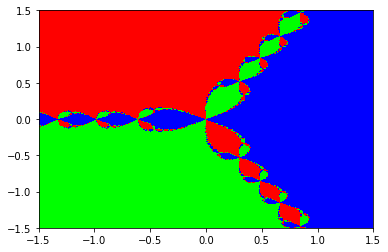

In [187]:
f = lambda x: x ** 3 - 1
f_prime = lambda x: 3 * x ** 2
zeros = np.array([1., (-1. / 2) + (np.sqrt(3) / 2) * 1j, (-1. / 2) - (np.sqrt(3) / 2) * 1j])
basin(f, f_prime, zeros, [-1.5, 1.5, -1.5, 1.5], 500, 50)

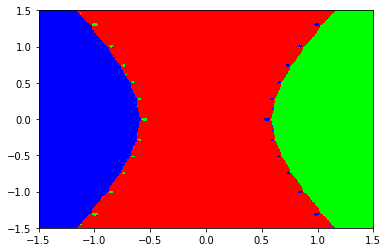

In [188]:
f = lambda x: x ** 3 - x
f_prime = lambda x: 3 * x ** 2 - 1
zeros = np.array([-1, 0, 1])
basin(f, f_prime, zeros, [-1.5, 1.5, -1.5, 1.5], 500, 50)